In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#Energy Efficiency (Heating load)

Data Set Information:

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
*  X1 Relative Compactness
*   X2 Surface Area
*  X3 Wall Area
*  X4 Roof Area
*  X5 Overall Height
*  X6 Orientation
*  X7 Glazing Area
*  X8 Glazing Area Distribution
*  y1 Heating Load
*  y2 Cooling Load

#Импорт данных, проверка читаемости

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_raw = pd.read_excel('drive/My ')
data_raw.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


In [ ]:
data_raw.tail(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


т.к. по варианту необходимо работать только с целевой переменной Heating Load, (Y1) можно удалить столбец Cooling Load (Y2)

In [ ]:
data_raw = data_raw.drop('Y2',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Необходимо подписать столбцы.

In [ ]:
#Есть только численные величины, категориальных - нет
numerical_names =['Compact', 'Surface', 'Wall', 'Roof', 'Height', 'Orient', 'Glazing', 'Glaz.Distro', 'HeatLoad']
arg_names =['Compact', 'Surface', 'Wall', 'Roof', 'Height', 'Orient', 'Glazing', 'Glaz.Distro']

data_raw.columns=numerical_names
data_raw.head(3)

,Compact,Surface,Wall,Roof,Height,Orient,Glazing,Glaz.Distro,HeatLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55


#Визуализация. Описательная статистика

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Compact      768 non-null    float64
 1   Surface      768 non-null    float64
 2   Wall         768 non-null    float64
 3   Roof         768 non-null    float64
 4   Height       768 non-null    float64
 5   Orient       768 non-null    int64  
 6   Glazing      768 non-null    float64
 7   Glaz.Distro  768 non-null    int64  
 8   HeatLoad     768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [ ]:
for col in data_raw.columns:
  missing_value_counts = data_raw[col].isna().sum()
  percentage = data_raw[col].isna().sum()/len(data_raw[col])*100
  print("Столбец",col,"содержит",missing_value_counts,
        "пропусков (%.2f %%)."%percentage)

Столбец Compact содержит 0 пропусков (0.00 %).
Столбец Surface содержит 0 пропусков (0.00 %).
Столбец Wall содержит 0 пропусков (0.00 %).
Столбец Roof содержит 0 пропусков (0.00 %).
Столбец Height содержит 0 пропусков (0.00 %).
Столбец Orient содержит 0 пропусков (0.00 %).
Столбец Glazing содержит 0 пропусков (0.00 %).
Столбец Glaz.Distro содержит 0 пропусков (0.00 %).
Столбец HeatLoad содержит 0 пропусков (0.00 %).


In [ ]:
data_raw[numerical_names].describe()

,Compact,Surface,Wall,Roof,Height,Orient,Glazing,Glaz.Distro,HeatLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


# Выводы:


* Пропусков в данных нет.
* Среднее не совпадает с медианой - распределение не соответствует нормальному.
* Диапазоны значений нужно показать предметным экспертам для анализа корректности.

# Визуальный анализ распределения и разброса данных

## Box plot, bar plot

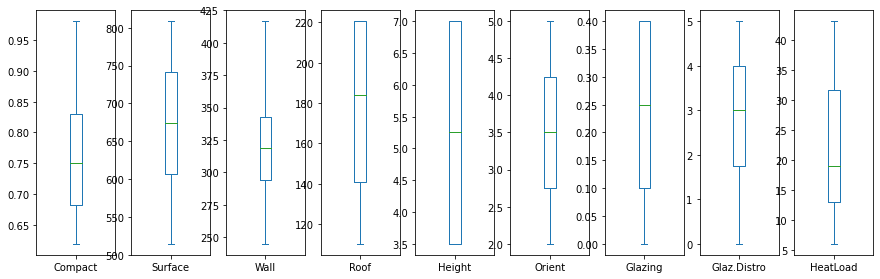

In [ ]:
data_raw.plot(kind='box',subplots=True,figsize=(15,4.5))
plt.show()

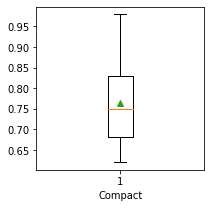

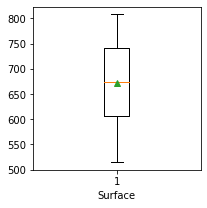

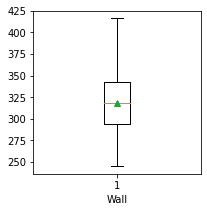

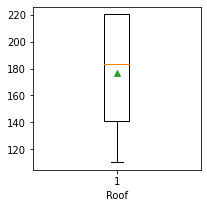

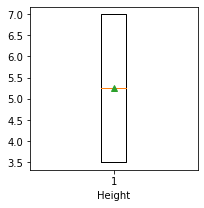

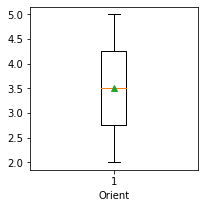

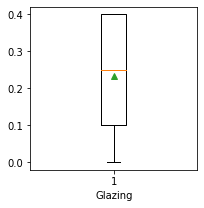

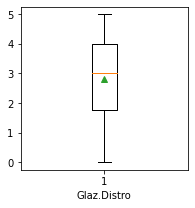

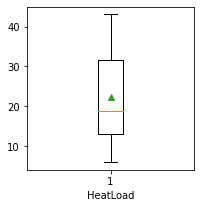

In [ ]:
#box plot каждого параметра
for col in data_raw.columns:
  fig, ax = plt.subplots(figsize=(3,3))
  # нужно использовать только непустые данные
  ax.boxplot(data_raw[col],
             showmeans=True)
  ax.set_xlabel(col)
  plt.show()

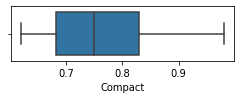

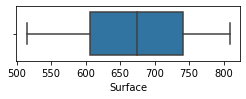

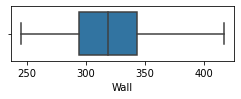

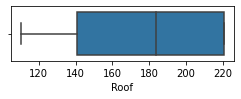

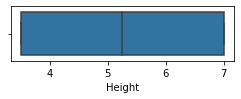

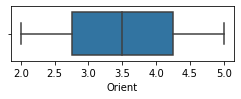

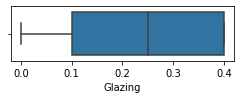

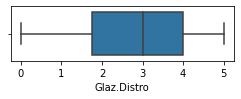

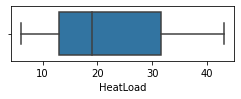

In [ ]:
for col in data_raw.columns:
  fig, ax = plt.subplots(figsize=(4,1))
  sns.boxplot(data=data_raw, x=col, ax=ax)
  plt.show()

## Гистограммы с оценкой плотности распределения

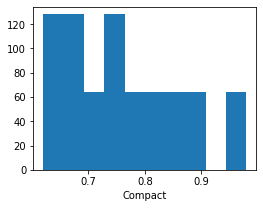

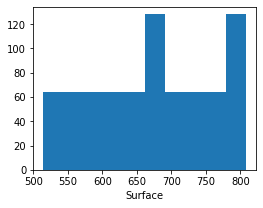

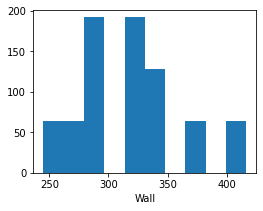

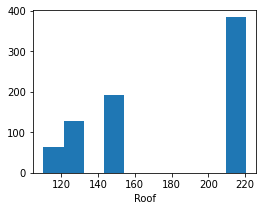

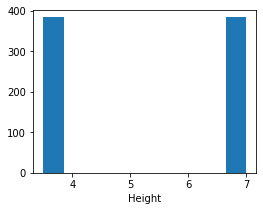

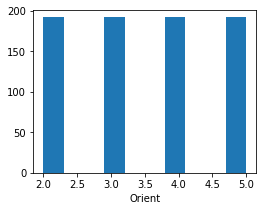

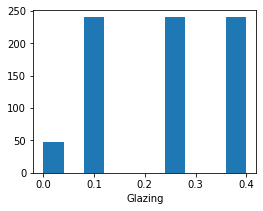

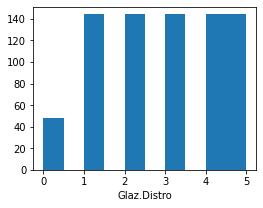

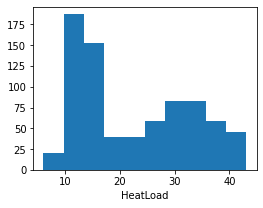

In [ ]:
for col in data_raw.columns:
  fig, ax = plt.subplots(figsize=(4,3))
  ax.hist(data_raw[col])
  ax.set_xlabel(col)
  plt.show()

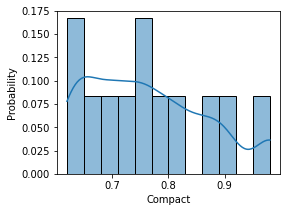

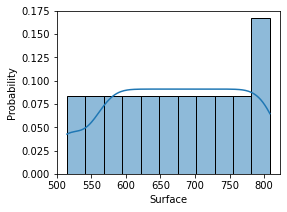

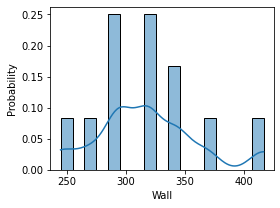

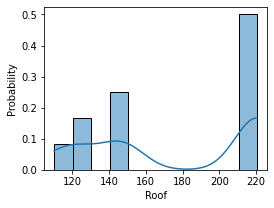

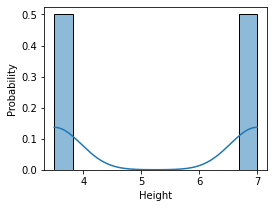

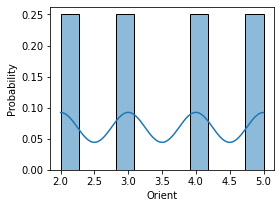

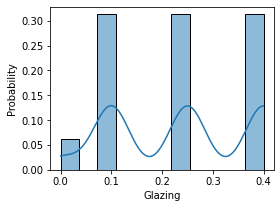

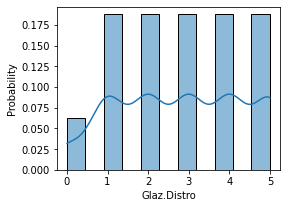

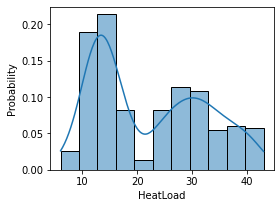

In [ ]:
for col in data_raw.columns:
  fig, ax = plt.subplots(figsize=(4,3))
  sns.histplot(data=data_raw, x=col,
               kde=True,
               stat='probability')
  plt.show()

Возникла гипотеза о том, что некоторые показатели являются дискретными. Проверим это.

In [ ]:
for col in arg_names:
  print(data_raw[col].value_counts(), '\n')

0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: Compact, dtype: int64 

514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: Surface, dtype: int64 

294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: Wall, dtype: int64 

220.50    384
147.00    192
122.50    128
110.25     64
Name: Roof, dtype: int64 

7.0    384
3.5    384
Name: Height, dtype: int64 

2    192
3    192
4    192
5    192
Name: Orient, dtype: int64 

0.10    240
0.25    240
0.40    240
0.00     48
Name: Glazing, dtype: int64 

1    144
2    144
3    144
4    144
5    144
0     48
Name: Glaz.Distro, dtype: int64 



##Выводы:

* Все нецелевые параметры можно представить как категории и распределить по группам
* Записи можно разделить на 12 категорий по 64 элемента в каждой. Необходимо рассмотреть зависимость значений
* Переменные не распределены нормально

# Проверка корелляции

## Парные графики

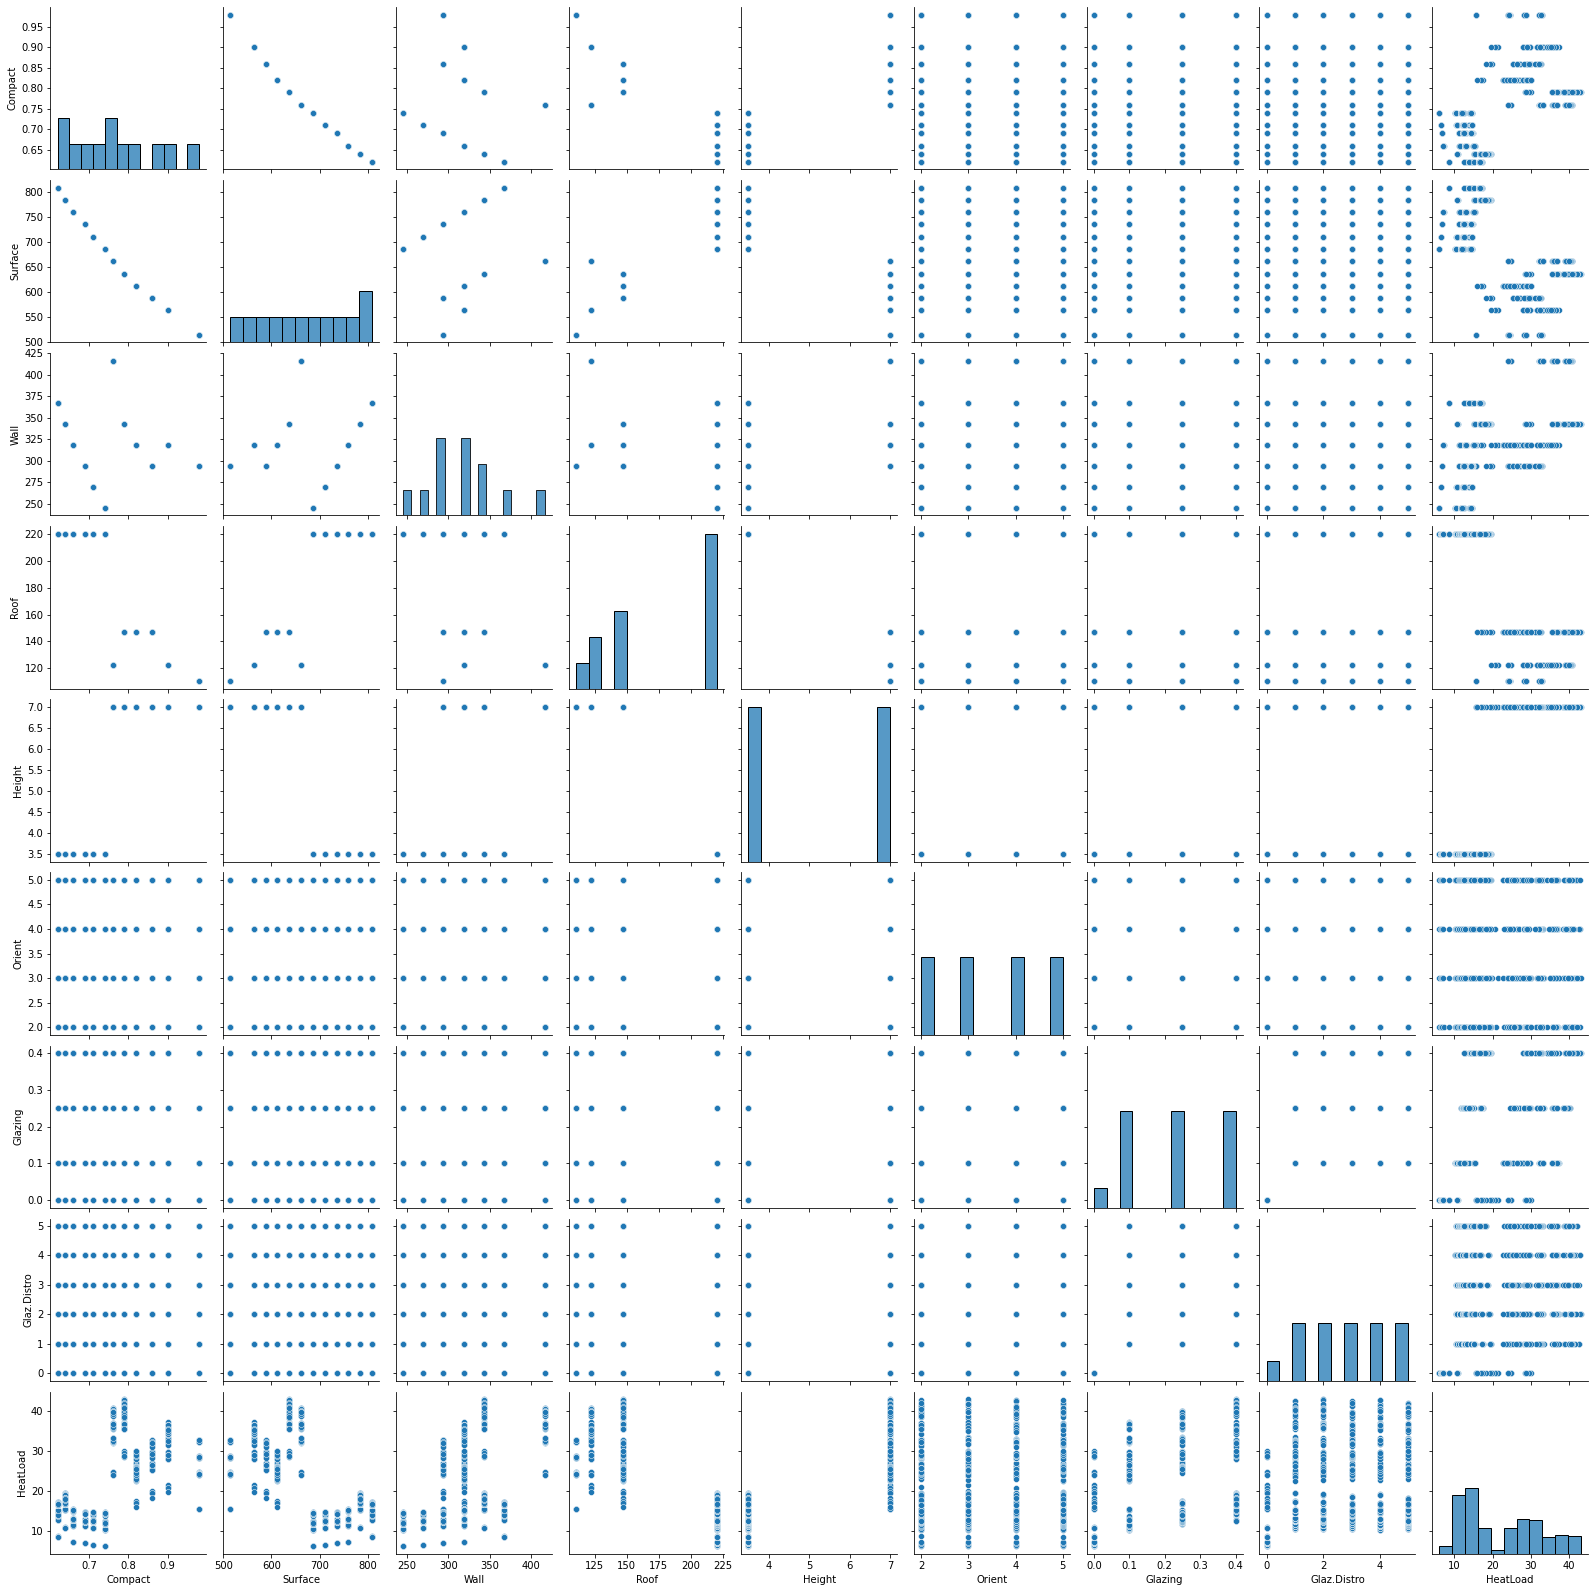

In [ ]:
sns.pairplot(data = data_raw, kind='scatter')
plt.show()

## Корелляции

Корелляционная матрица

In [ ]:
data_raw.corr()

,Compact,Surface,Wall,Roof,Height,Orient,Glazing,Glaz.Distro,HeatLoad
Compact,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272
Surface,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120
Wall,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671
Roof,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828
Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430
Orient,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587
Glazing,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842
Glaz.Distro,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368
HeatLoad,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000


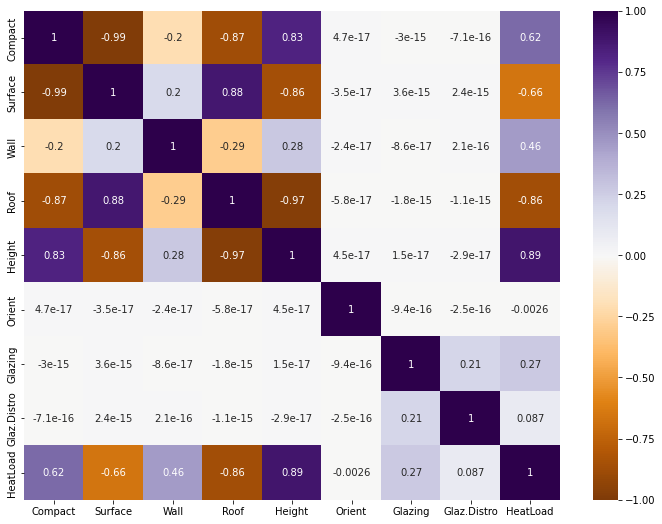

In [ ]:
_, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data=data_raw.corr(),
            annot=True,vmin=-1,vmax=1,
            cmap='PuOr')
plt.show()

Изучим "сильные" и "средние" корелляции

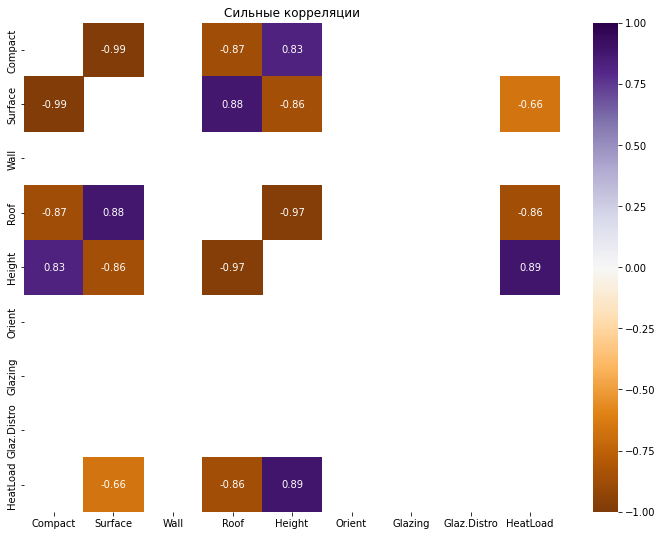

In [ ]:
_, ax = plt.subplots(figsize=(12,9))
#установим массив условий отображения для определения сильной корелляции
sns.heatmap(data=data_raw.corr()[ (data_raw.corr() > 0.65) &
                       (data_raw.corr() < 1) |
                       (data_raw.corr() < -0.65) &
                       (data_raw.corr() > -1) ],
            annot=True, vmin=-1,vmax=1,
            cmap='PuOr')
ax.set_title('Сильные корреляции')
plt.show()

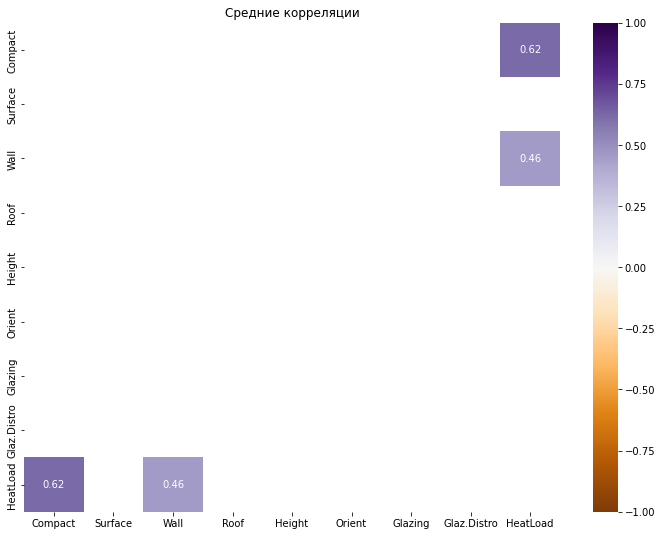

In [ ]:
_, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data=data_raw.corr()[ (data_raw.corr() > 0.3) &
                       (data_raw.corr() <= 0.65 ) |
                       (data_raw.corr() >= -0.65) &
                       (data_raw.corr() < -0.3) ],
            annot=True, vmin=-1,vmax=1,
            cmap='PuOr')
ax.set_title('Средние корреляции')
plt.show()

## Вывод:


Между целевой переменной существуют сильные корелляции с "Surface", "Roof", "Height". Средние корелляции с "Compact", "Wall".


Существуют сильные кореляциии целевой переменной с параметрами: "Surface Area", "Roof Area" и "Overall Height".
Прослеживаются очень сильные корелляции между "Compact", "Roof", "Height" и "Surface" взаимно. Притом корелляция между "Compact" и "Surface" - -0.99, а между Roof и Height - -0.97.


---

Предположение - существует 12 различных видов домов, каждая - с конкретными характеристиками "Compact", "Roof", "Height", "Surface". Параметры Wall, Orient, Glazing и Glaz. Distro имеют слабую корелляцию, т.е. их можно оставить как независимые.

#МГК

##Без нормировки

In [ ]:
input_names=['Compact', 'Surface', 'Wall', 'Roof', 'Height', 'Orient', 'Glazing', 'Glaz.Distro']
target_names=['HeatLoad']

In [ ]:
X = data_raw[input_names].values
X[0:3]

array([[  0.98, 514.5 , 294.  , 110.25,   7.  ,   2.  ,   0.  ,   0.  ],
       [  0.98, 514.5 , 294.  , 110.25,   7.  ,   3.  ,   0.  ,   0.  ],
       [  0.98, 514.5 , 294.  , 110.25,   7.  ,   4.  ,   0.  ,   0.  ]])

In [ ]:
my_pca_01 = PCA()
my_pca_01.fit(X)
z = my_pca_01.transform(X)
z[0:3]

array([[ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
         1.50000000e+00,  7.58471832e-01, -1.82531040e-01,
        -1.24117263e-02,  8.13801762e-15],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
         5.00000000e-01,  7.58471832e-01, -1.82531040e-01,
        -1.24117263e-02,  8.61996041e-15],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -5.00000000e-01,  7.58471832e-01, -1.82531040e-01,
        -1.24117263e-02,  9.10190320e-15]])

In [ ]:
print(my_pca_01.explained_variance_ratio_*100,'%.3')

[8.07032434e+01 1.92639516e+01 2.05504811e-02 1.06893310e-02
 1.41960454e-03 1.44648296e-04 9.05142690e-07 7.13130367e-30] %.3


In [ ]:
pca_names = []
for i in range(8):
  pca_names.append('pca_'+str(i+1))
z[0]

array([ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,  1.50000000e+00,
        7.58471832e-01, -1.82531040e-01, -1.24117263e-02,  8.13801762e-15])

In [ ]:
pca_data_01 = pd.DataFrame(z, columns=pca_names)
pca_data_01['HeatLoad'] = data_raw['HeatLoad'].copy()
pca_data_01.head(3)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,HeatLoad
0,171.647343,-16.040847,2.81634,1.5,0.758472,-0.182531,-0.012412,8.138018e-15,15.55
1,171.647343,-16.040847,2.81634,0.5,0.758472,-0.182531,-0.012412,8.619960e-15,15.55
2,171.647343,-16.040847,2.81634,-0.5,0.758472,-0.182531,-0.012412,9.101903e-15,15.55


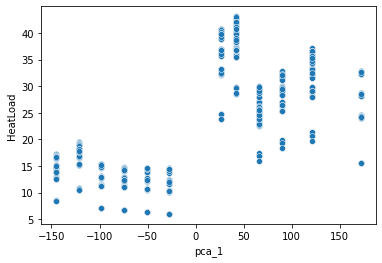

In [ ]:
sns.scatterplot(data = pca_data_01, x='pca_1', y='HeatLoad')
plt.show()

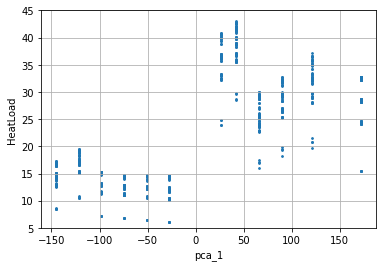

In [ ]:
fig, ax = plt.subplots()
ax.scatter(pca_data_01['pca_1'], pca_data_01['HeatLoad'], s=3)
ax.grid()
ax.set_xlabel('pca_1')
ax.set_ylabel('HeatLoad')
ax.set_ylim(5,45)
plt.show()

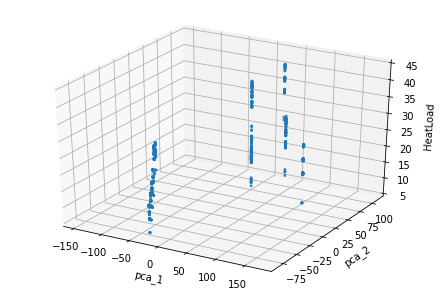

In [ ]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_data_01['pca_1'], pca_data_01['pca_2'],
           pca_data_01['HeatLoad'], s=4)
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('HeatLoad')
ax.set_zlim(5,45)
plt.show()

## Выводы:

При применении МГК мы получаем 8 компонент. Первая компонента ответственна за 80.7% всего отклонения (Variation), вторая - 19.26%. То есть первые две компоненты составляют 99.96% всего отклонения. Следовательно, количество параметров можно сократить до одного-двух параметров PC1, PC2 с минимальными потерями в точности.

## С нормировкой

In [ ]:
scaler1 = MinMaxScaler()
scaler1.fit(data_raw[input_names].values)
scaled_data_1 = scaler1.transform(data_raw[input_names].values)

In [ ]:
scaled_data_1 = pd.DataFrame(scaled_data_1)
scaled_data_1['HeatLoad'] = data_raw['HeatLoad'].copy()
scaled_data_1.columns = data_raw.columns
scaled_data_1.head(3)

,Compact,Surface,Wall,Roof,Height,Orient,Glazing,Glaz.Distro,HeatLoad
0,1.0,0.0,0.285714,0.0,1.0,0.000000,0.0,0.0,15.55
1,1.0,0.0,0.285714,0.0,1.0,0.333333,0.0,0.0,15.55
2,1.0,0.0,0.285714,0.0,1.0,0.666667,0.0,0.0,15.55


In [ ]:
scaled_data_1.describe()

,Compact,Surface,Wall,Roof,Height,Orient,Glazing,Glaz.Distro,HeatLoad
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500,22.307195
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192,10.090204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.010000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000,12.992500
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000,18.950000
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000,31.667500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.100000


In [ ]:
scaler2 = StandardScaler()
scaled_data_2 = scaler2.fit_transform(data_raw[input_names].values)

In [ ]:
scaled_data_2 = pd.DataFrame(scaled_data_2)
scaled_data_2['HeatLoad'] = data_raw['HeatLoad'].copy()
scaled_data_2.columns = data_raw.columns
scaled_data_2.head(3)

,Compact,Surface,Wall,Roof,Height,Orient,Glazing,Glaz.Distro,HeatLoad
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,15.55
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,15.55
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,15.55


In [ ]:
scaled_data_2.describe()

,Compact,Surface,Wall,Roof,Height,Orient,Glazing,Glaz.Distro,HeatLoad
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,768.000000,7.680000e+02,7.680000e+02,768.000000
mean,-1.451385e-16,-4.440892e-16,-1.734723e-18,3.709417e-16,0.000000,0.000000,2.064321e-15,-8.910696e-16,22.307195
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652,1.000652,1.000652e+00,1.000652e+00,10.090204
min,-1.363812e+00,-1.785875e+00,-1.685854e+00,-1.470077e+00,-1.000000,-1.341641,-1.760447e+00,-1.814575e+00,6.010000
25%,-7.725642e-01,-7.421818e-01,-5.619515e-01,-7.915797e-01,-1.000000,-0.670820,-1.009323e+00,-6.855062e-01,12.992500
50%,-1.340162e-01,2.319318e-02,0.000000e+00,1.583159e-01,0.000000,0.000000,1.173631e-01,1.209717e-01,18.950000
75%,6.227813e-01,7.885681e-01,5.619515e-01,9.725122e-01,1.000000,0.670820,1.244049e+00,7.661539e-01,31.667500
max,2.041777e+00,1.553943e+00,2.247806e+00,9.725122e-01,1.000000,1.341641,1.244049e+00,1.411336e+00,43.100000


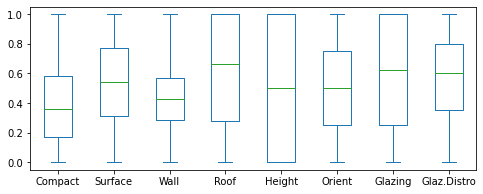

In [ ]:
scaled_data_1[input_names].plot(kind='box',figsize=(8,3))
plt.show()

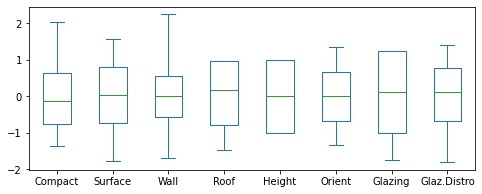

In [ ]:
scaled_data_2[input_names].plot(kind='box',figsize=(8,3))
plt.show()

In [ ]:
pca_02 = PCA()
z2 = pca_02.fit_transform(scaled_data_2[input_names])
z2[0:3]

array([[ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00,
         1.34164079e+00, -3.82743898e-02,  4.77611838e-01,
        -4.86937592e-02,  2.25745095e-14],
       [ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00,
         4.47213595e-01, -3.82743898e-02,  4.77611838e-01,
        -4.86937592e-02, -2.83326941e-15],
       [ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00,
        -4.47213595e-01, -3.82743898e-02,  4.77611838e-01,
        -4.86937592e-02,  2.94894138e-15]])

In [ ]:
pca_02 = pd.DataFrame(z2, columns=pca_names)
pca_02['HeatLoad'] = data_raw['HeatLoad'].copy()
pca_02.head(3)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,HeatLoad
0,3.128954,-0.902373,2.527922,1.341641,-0.038274,0.477612,-0.048694,2.257451e-14,15.55
1,3.128954,-0.902373,2.527922,0.447214,-0.038274,0.477612,-0.048694,-2.833269e-15,15.55
2,3.128954,-0.902373,2.527922,-0.447214,-0.038274,0.477612,-0.048694,2.948941e-15,15.55


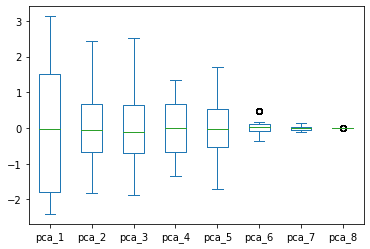

In [ ]:
pca_02[pca_names].plot(kind='box')
plt.show()

##Вывод:

#Линейная регрессия. Оценка важности переменных.

##По исходным нормированным данным

In [ ]:
x = scaled_data_1[input_names].values
y = scaled_data_1[target_names].values

In [ ]:
linear_model_1 = LinearRegression()
linear_model_1.fit(x,y)

LinearRegression()

In [ ]:
predicted_y = linear_model_1.predict(x)

Ошибки

In [ ]:
print('MSE =', mean_squared_error(y, predicted_y))

MSE = 8.542371415130615


In [ ]:
print('R2 =', r2_score(y, predicted_y))

R2 = 0.915987401915152


In [ ]:
print('Коэффициенты при х (slope)', linear_model_1.coef_)
print('Свободный член (intercept)', linear_model_1.intercept_)

Коэффициенты при х (slope) [[-2.30039432e+01 -3.38195283e+14  1.97280581e+14  2.53646462e+14
   1.45312500e+01  4.95531757e-02  7.89207627e+00  9.68164064e-01]]
Свободный член (intercept) [-5.63658804e+13]


In [ ]:
print('Коэффициенты при х (slope):')
for i in range(8):
  print('  ', input_names[i],':',linear_model_1.coef_[0][i])
print('Свободный член (intercept)', linear_model_1.intercept_)

Коэффициенты при х (slope):
   Compact : -23.003943246434734
   Surface : -338195282521536.8
   Wall : 197280581470891.94
   Roof : 253646461891133.25
   Height : 14.53125
   Orient : 0.04955317567454199
   Glazing : 7.8920762718317325
   Glaz.Distro : 0.9681640635473436
Свободный член (intercept) [-5.63658804e+13]


## По нормированным данным МГК


In [ ]:
x2 = pca_02['pca_1'].values
y2 = pca_02[target_names].values

In [ ]:
linear_model_2 = LinearRegression()
linear_model_2.fit(x2.reshape(-1, 1), y2)
predicted_y_2 = linear_model_2.predict(x2.reshape(-1, 1))

In [ ]:
print('MSE =', mean_squared_error(y2, predicted_y_2))
print('R2 =', r2_score(y2, predicted_y_2))

MSE = 37.38427299171503
R2 = 0.6323327857198808


In [ ]:
print('Коэффициенты при х (slope)', linear_model_2.coef_)
print('Свободный член (intercept)', linear_model_2.intercept_)

Коэффициенты при х (slope) [[4.16693352]]
Свободный член (intercept) [22.30719531]


In [ ]:
x_line = np.array([-3, 3])
y_line = linear_model_2.coef_[0]*x_line+linear_model_2.intercept_

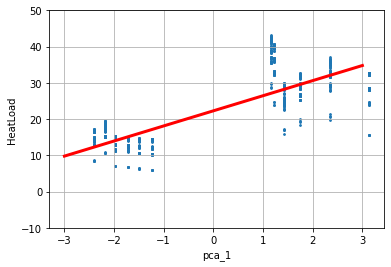

In [ ]:
fig, ax = plt.subplots()
ax.scatter(pca_02['pca_1'], pca_02['HeatLoad'], s=3)
ax.plot(x_line, y_line, color='red', lw=3)
ax.grid()
ax.set_xlabel('pca_1')
ax.set_ylabel('HeatLoad')
ax.set_ylim(-10,50)
plt.show()

## Вывод

Проведена задача линейной регрессии как по исходным нормированным данным, так и с использованием МГК.